In [5]:
import numpy as np
from sparse_shift.datasets import sample_topological, sample_nonlinear_icp_sim
from sparse_shift.plotting import plot_dag
from sparse_shift.testing import test_mechanism_shifts, test_mechanism
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from causallearn.utils.cit import fisherz, kci

In [3]:
# X1 -> X2, X1->X3, X2->X3
true_parents = np.asarray([[0,  0, 0], [1, 0, 0], [1, 1 ,0]])
n = 100

g_noise = lambda: np.abs(np.random.standard_t(df=100))
g1_equations = [
    lambda X, U: U,
    lambda X, U: X[0] + U,
    lambda X, U: X[0] + X[1] + U,
]

g2_equations = [
    lambda X, U: U,
    lambda X, U: np.sqrt(2*np.pi*X[0]) + U,
    lambda X, U: X[0] + X[1] + U,
]

# 2 settings, X2|X1 changes
Xs = [
    sample_topological(n, g1_equations, g_noise, random_state=1),
    sample_topological(n, g2_equations, g_noise, random_state=2),
]

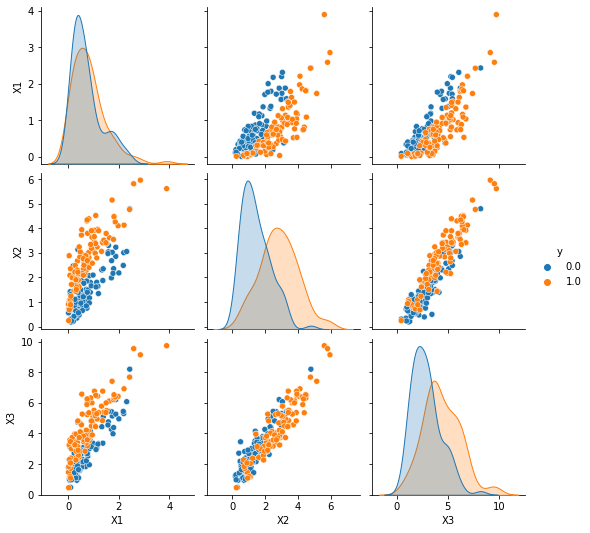

In [4]:
df = pd.DataFrame(
    np.hstack((
        np.vstack(Xs),
        np.hstack([[i]*X.shape[0] for i, X in enumerate(Xs)]).reshape(-1, 1).astype(int)
    )),
    columns=[f'X{i+1}' for i in range(Xs[0].shape[1])] + ['y']
)
sns.pairplot(df, hue='y')
plt.show()

In [52]:
m = 1
test_mechanism(Xs, m, true_parents[m], test='fisherz')
m = 1
test_mechanism(Xs, m, true_parents[m], test='kci')

array([[1., 0.],
       [0., 1.]])